# Subplots and Layouts

## Subgráficos y Disposición

A menudo, necesitamos visualizar múltiples conjuntos de datos o diferentes perspectivas de los mismos datos dentro de una única figura. Matplotlib nos proporciona herramientas potentes para crear subplots (*subgráficos*) y organizar su layout (*disposición*) de forma eficiente. Esto nos permite comparar gráficos fácilmente, presentar análisis multifacéticos y optimizar el espacio visual de nuestras figuras.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Subplots

### `plt.subplot()`

La función `subplot()` es una forma sencilla de añadir subgráficos a una figura. Es ideal para layouts simples y cuando conocemos de antemano el número y la posición de nuestros gráficos.

- `plt.subplot(nrows, ncols, index)`: Crea un subgráfico dentro de una cuadrícula imaginaria.
  - `nrows`: Número de filas de la cuadrícula.
  - `ncols`: Número de columnas de la cuadrícula.
  - `index`: Posición del subgráfico actual (comienza en 1, de izquierda a derecha, de arriba abajo).
- `plt.figure()`: Crea una nueva figura si no existe una. No es estrictamente necesario antes de subplot, pero es una buena práctica para controlar el tamaño de la figura.

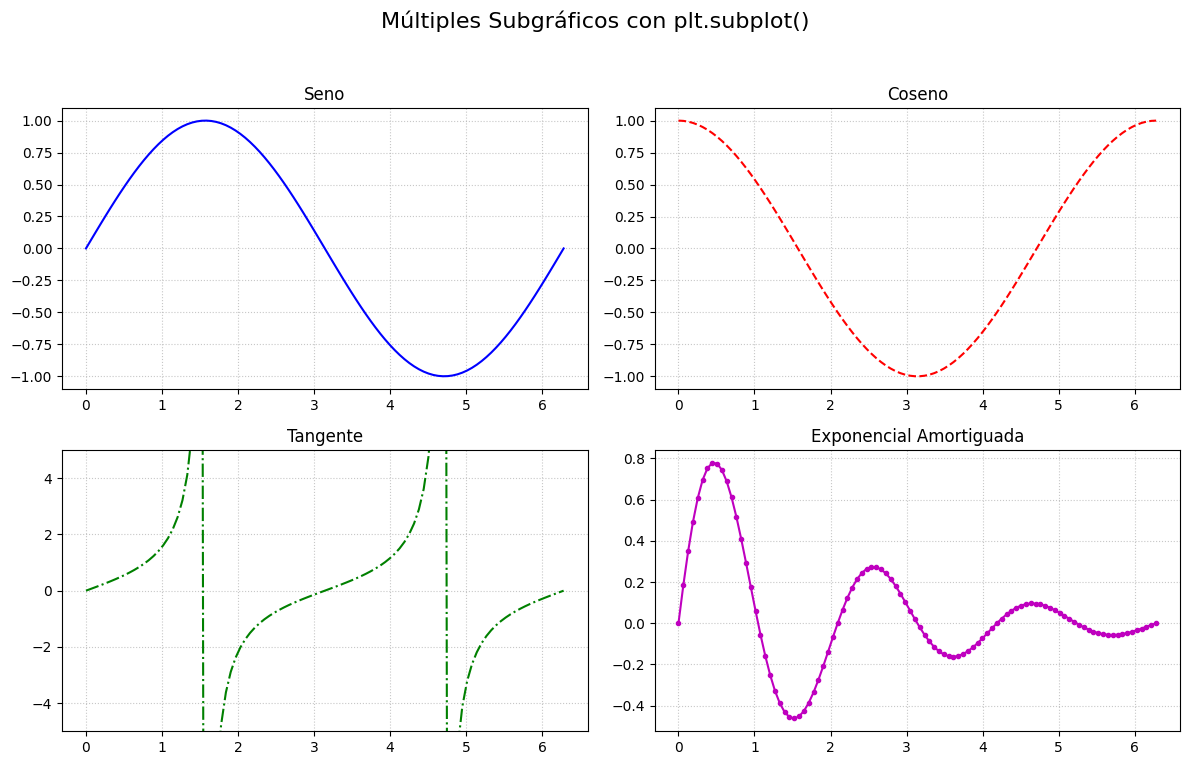

In [2]:
#Datos de ejemplo
x = np.linspace(0, 2 * np.pi, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)
y_tan = np.tan(x)
y_exp = np.exp(-x/2) * np.sin(x*3)

plt.figure(figsize=(12, 8)) #Creamos una figura para controlar su tamaño

#Primer subgráfico (1 fila, 2 columnas, posición 1)
plt.subplot(2, 2, 1)
plt.plot(x, y_sin, 'b-')
plt.title('Seno')
plt.grid(True, linestyle=':', alpha=0.7)

#Segundo subgráfico (1 fila, 2 columnas, posición 2)
plt.subplot(2, 2, 2)
plt.plot(x, y_cos, 'r--')
plt.title('Coseno')
plt.grid(True, linestyle=':', alpha=0.7)

#Tercer subgráfico (2 filas, 2 columnas, posición 3)
plt.subplot(2, 2, 3)
plt.plot(x, y_tan, 'g-.')
plt.ylim(-5, 5) #Limitar para mejor visualización de tan
plt.title('Tangente')
plt.grid(True, linestyle=':', alpha=0.7)

#Cuarto subgráfico (2 filas, 2 columnas, posición 4)
plt.subplot(2, 2, 4)
plt.plot(x, y_exp, 'm-o', markersize=3)
plt.title('Exponencial Amortiguada')
plt.grid(True, linestyle=':', alpha=0.7)

plt.suptitle('Múltiples Subgráficos con plt.subplot()', fontsize=16) #Título general de la figura
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #Ajustar layout, dejando espacio para el suptitle
plt.show()

### `plt.subplots()`

La función `subplots()` es la forma recomendada y más flexible de crear subgráficos, ya que devuelve tanto la figura como un array de ejes (`Axes`) que podemos manipular directamente. Esto ofrece un control mucho más preciso y programático.

- `fig, ax = plt.subplots(nrows, ncols, **kwargs)`: Crea una figura y un conjunto de subgráficos.
  - `fig`: El objeto `Figure` (la *"hoja"* del gráfico).
  - `ax`: Un array de objetos `Axes` (los *"gráficos"* individuales). Si `nrows` o `ncols` es 1, `ax` puede ser unidimensional. Si ambos son mayores que 1, `ax` es un array 2D.
  - `sharex=True` y `sharey=True`: Argumentos opcionales para `plt.subplots()` que permiten compartir el mismo eje X o Y entre todos los subgráficos. Esto es útil para comparar escalas.

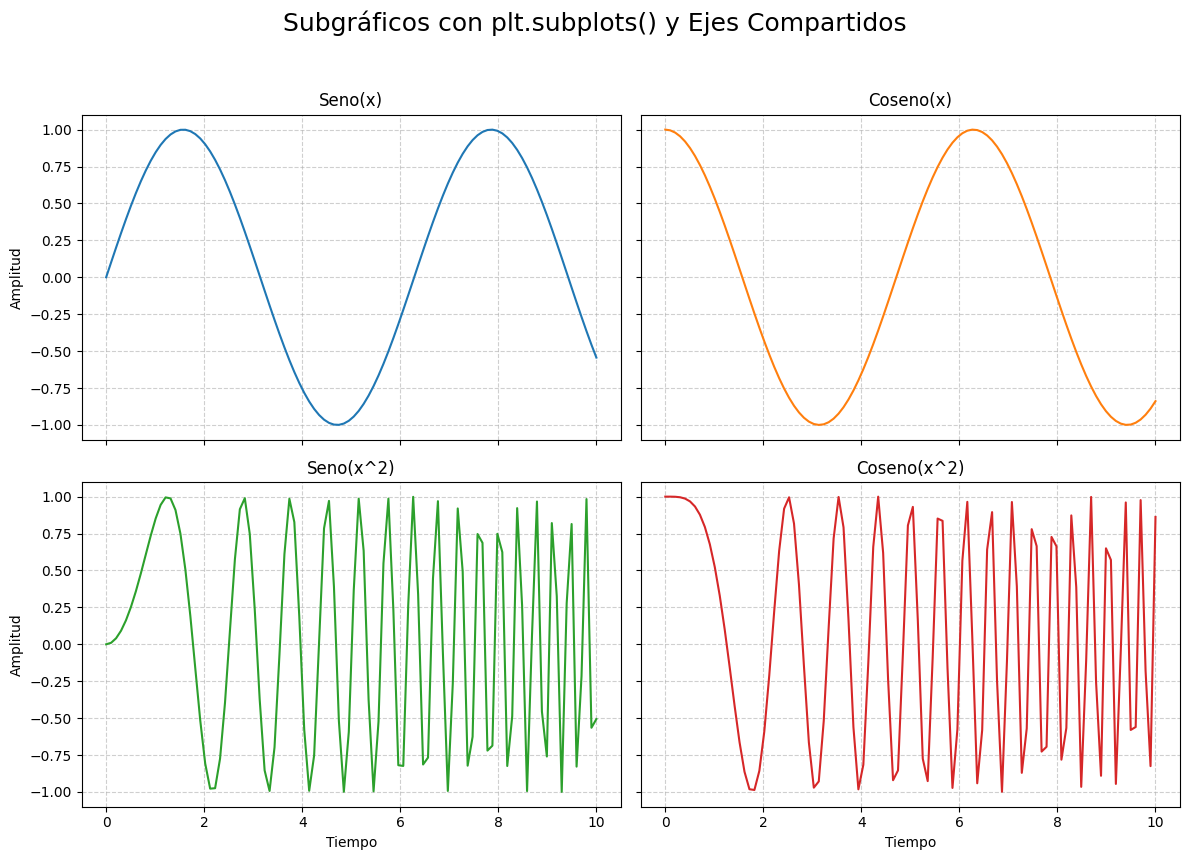

In [3]:
#Datos de ejemplo
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x**2)
y4 = np.cos(x**2)

#Crear una figura con 2 filas y 2 columnas de subgráficos
#fig es el objeto Figure, ax es un array de objetos Axes
fig, ax = plt.subplots(2, 2, figsize=(12, 9), sharex=True, sharey=True)

#Acceder a los ejes usando indexación de array (fila, columna)
ax[0, 0].plot(x, y1, 'tab:blue')
ax[0, 0].set_title('Seno(x)')
ax[0, 0].set_ylabel('Amplitud') #Etiqueta Y solo en el primero de la fila

ax[0, 1].plot(x, y2, 'tab:orange')
ax[0, 1].set_title('Coseno(x)')

ax[1, 0].plot(x, y3, 'tab:green')
ax[1, 0].set_title('Seno(x^2)')
ax[1, 0].set_xlabel('Tiempo') #Etiqueta X solo en el último de la columna
ax[1, 0].set_ylabel('Amplitud')

ax[1, 1].plot(x, y4, 'tab:red')
ax[1, 1].set_title('Coseno(x^2)')
ax[1, 1].set_xlabel('Tiempo')

#Añadir una rejilla a todos los subgráficos (podría hacerse en cada uno si se quiere distinto)
for row_ax in ax:
    for sub_ax in row_ax:
        sub_ax.grid(True, linestyle='--', alpha=0.6)

fig.suptitle('Subgráficos con plt.subplots() y Ejes Compartidos', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #Ajusta automáticamente los parámetros de la subtrama
plt.show()

## Advanced Layouts

Para diseños de subgráficos más complejos, donde los subgráficos no forman una cuadrícula regular o se extienden por múltiples celdas, `GridSpec` y `subplot2grid()` son herramientas poderosas.

### `gridspec.GridSpec()`

La función `matplotlib.gridspec.GridSpec(nrows, ncols, **kwargs)` crea una rejilla abstracta donde los subgráficos pueden ser colocados. Recibe como argumentos `nrows` y `ncols` que son las dimensiones de la rejilla.

### `plt.subplot(gridspec[])`

`plt.subplot(gridspec[row_slice, col_slice])` se utiliza con un objeto `GridSpec` para especificar la ubicación y el tamaño de un subgráfico. `row_slice` y `col_slice` pueden ser enteros o rangos (*slices de Python*).



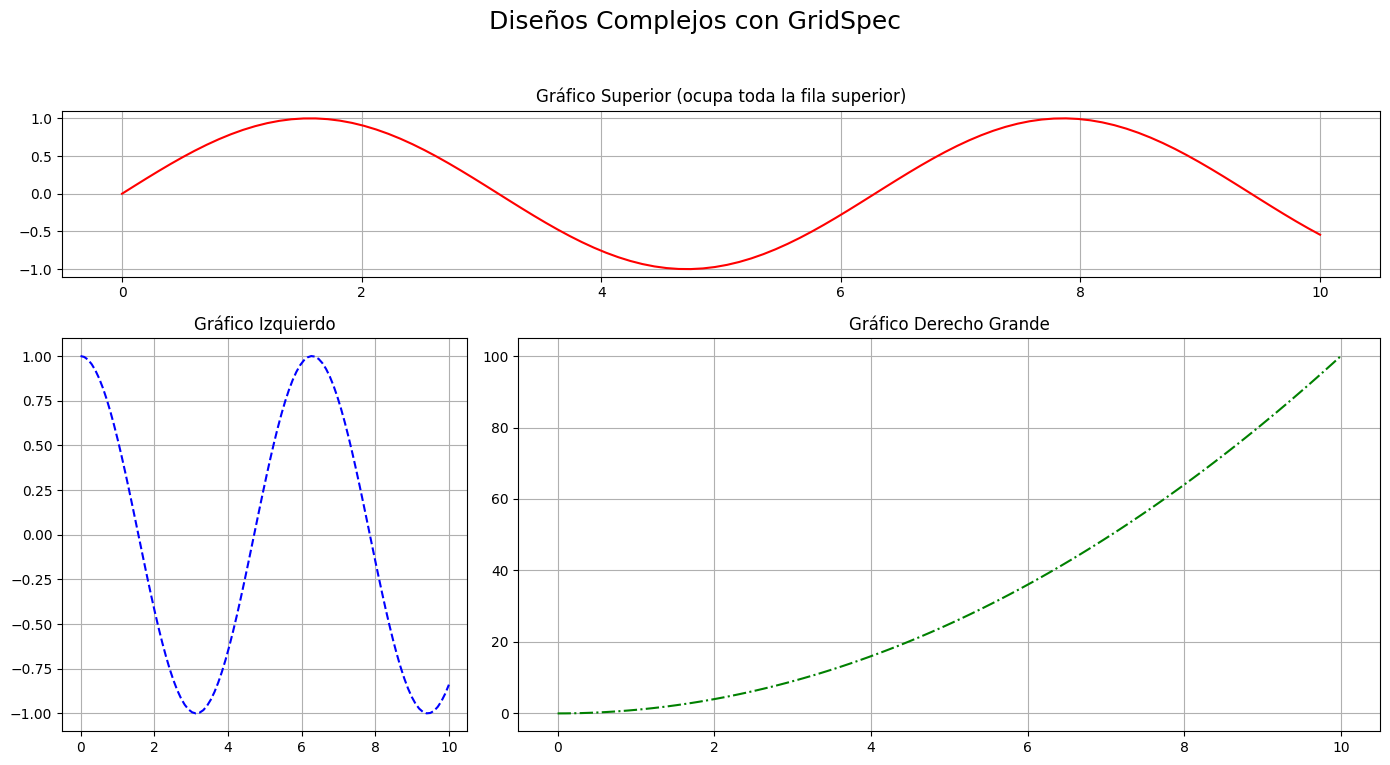

In [4]:
import matplotlib.gridspec as gridspec

#Datos de ejemplo
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = x**2
y4 = np.exp(x/2)

fig = plt.figure(figsize=(14, 8))

#Definir una rejilla de 3 filas x 3 columnas con GridSpec
gs = gridspec.GridSpec(3, 3, figure=fig)

#Subgráfico superior que ocupa 1 fila y las 3 columnas
ax1 = fig.add_subplot(gs[0, :]) # gs[fila_inicio:fila_fin, col_inicio:col_fin]
ax1.plot(x, y1, 'r-') #Abreviación de color y linestyle
ax1.set_title('Gráfico Superior (ocupa toda la fila superior)')
ax1.grid(True)

#Subgráfico a la izquierda que ocupa 2 filas y 1 columna
ax2 = fig.add_subplot(gs[1:, 0]) #Desde la fila 1 hasta el final, primera columna
ax2.plot(x, y2, 'b--')
ax2.set_title('Gráfico Izquierdo')
ax2.grid(True)

#Subgráfico central que ocupa 2 filas y 2 columnas
ax3 = fig.add_subplot(gs[1:, 1:]) #Desde la fila 1 hasta el final, desde la columna 1 hasta el final
ax3.plot(x, y3, 'g-.')
ax3.set_title('Gráfico Derecho Grande')
ax3.grid(True)

fig.suptitle('Diseños Complejos con GridSpec', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #Ajusta para el suptitle
plt.show()

### `plt.subplot2grid()`

La función `plt.subplot2grid(shape, loc, rowspan=1, colspan=1, **kwargs)` es una alternativa más concisa para layouts complejos.
- `shape`: Tupla `(nrows, ncols)` de la rejilla.
- `loc`: Tupla `(row_idx, col_idx)` de la celda superior izquierda donde comienza el subgráfico.
- `rowspan`: Cuántas filas de la rejilla ocupa el subgráfico.
- `colspan`: Cuántas columnas de la rejilla ocupa el subgráfico.

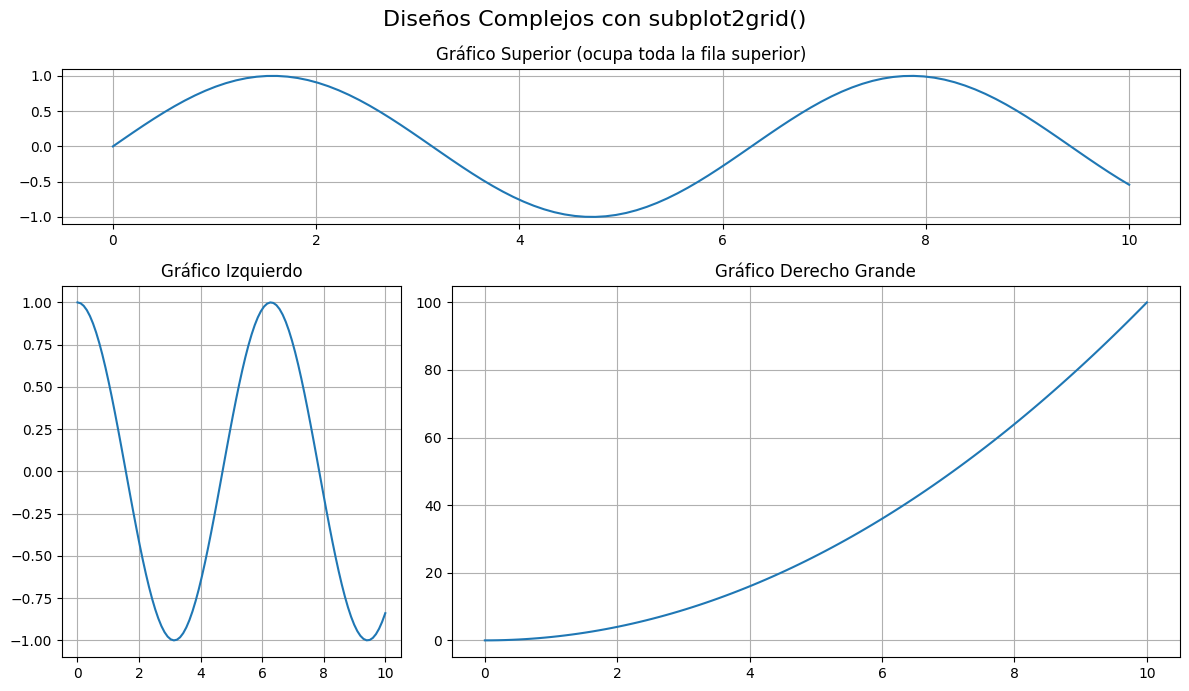

In [5]:
#Datos de ejemplo
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = x**2
y4 = np.exp(x/2)

fig2 = plt.figure(figsize=(12, 7))

#Usando plt.subplot2grid
ax_top = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax_top.plot(x, y1)
ax_top.set_title('Gráfico Superior (ocupa toda la fila superior)')
ax_top.grid(True)

ax_left = plt.subplot2grid((3, 3), (1, 0), rowspan=2)
ax_left.plot(x, y2)
ax_left.set_title('Gráfico Izquierdo')
ax_left.grid(True)

ax_right = plt.subplot2grid((3, 3), (1, 1), colspan=2, rowspan=2)
ax_right.plot(x, y3)
ax_right.set_title('Gráfico Derecho Grande')
ax_right.grid(True)

fig2.suptitle('Diseños Complejos con subplot2grid()', fontsize=16)
plt.tight_layout()

plt.show()

## Automatic Subframe and Spacing Adjustment

Cuando tenemos varios subgráficos, es común que se solapen títulos, etiquetas o incluso los propios gráficos. `plt.tight_layout()` y el ajuste manual del espaciado son esenciales para una presentación limpia.

- `plt.tight_layout(**kwargs)`: Ajusta automáticamente los parámetros de la subtrama para dar un diseño ajustado. Intenta evitar el solapamiento.
  - `rect`: Lista `[left, bottom, right, top]` para especificar un rectángulo donde se ajustan los subgráficos. Útil si tienes un `suptitle`.
- `plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)`: Permite ajustar manualmente el espaciado entre subgráficos y los márgenes de la figura.
  - `wspace`: Espacio reservado para el ancho entre subgráficos, como una fracción del ancho promedio de los ejes.
  - `hspace`: Espacio reservado para la altura entre subgráficos, como una fracción de la altura promedio de los ejes.

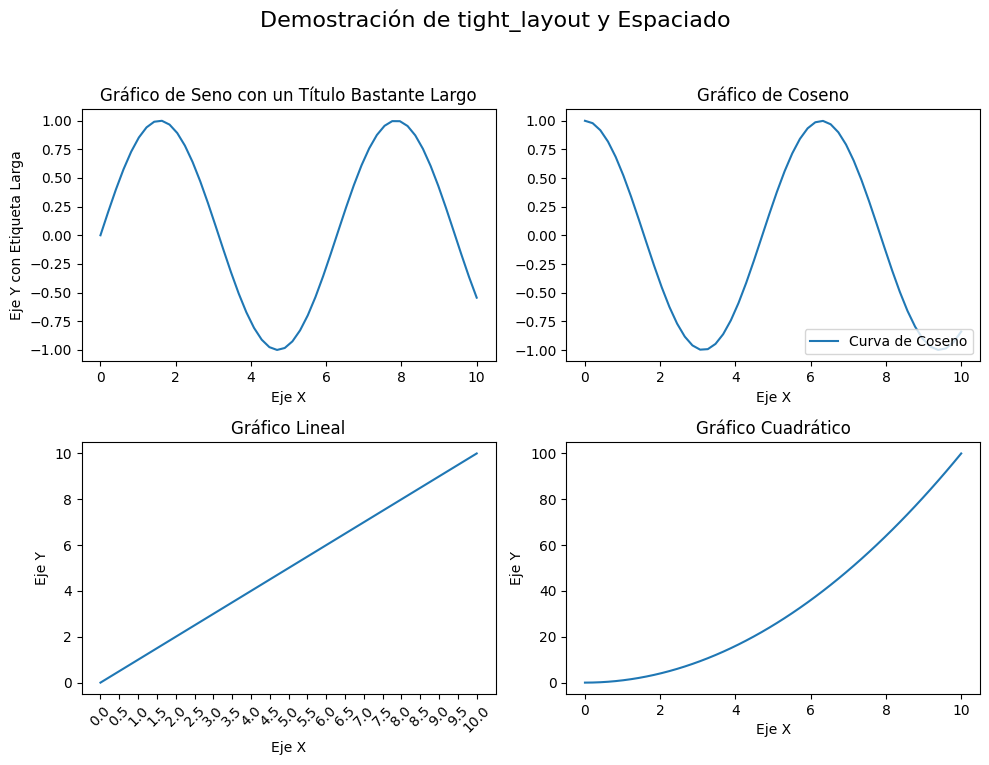

In [6]:
#Datos de ejemplo
x = np.linspace(0, 10, 50)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = x
y4 = x**2

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

#Subgráfico con título largo
ax[0, 0].plot(x, y1)
ax[0, 0].set_title('Gráfico de Seno con un Título Bastante Largo')
ax[0, 0].set_xlabel('Eje X')
ax[0, 0].set_ylabel('Eje Y con Etiqueta Larga')

#Subgráfico con una leyenda que puede solaparse
ax[0, 1].plot(x, y2, label='Curva de Coseno')
ax[0, 1].set_title('Gráfico de Coseno')
ax[0, 1].legend(loc='lower right')
ax[0, 1].set_xlabel('Eje X')

#Subgráfico con muchos ticks
ax[1, 0].plot(x, y3)
ax[1, 0].set_title('Gráfico Lineal')
ax[1, 0].set_xticks(np.arange(0, 10.1, 0.5)) #Ticks muy juntos
ax[1, 0].tick_params(axis='x', rotation=45) #Rotar etiquetas para evitar solapamiento
ax[1, 0].set_xlabel('Eje X')
ax[1, 0].set_ylabel('Eje Y')

#Subgráfico normal
ax[1, 1].plot(x, y4)
ax[1, 1].set_title('Gráfico Cuadrático')
ax[1, 1].set_xlabel('Eje X')
ax[1, 1].set_ylabel('Eje Y')

#Antes de plt.tight_layout(), a menudo hay solapamiento.
#plt.tight_layout() intenta solucionar esto automáticamente.
#Si tenemos un suptitle, necesitamos darle espacio con el argumento 'rect'.
fig.suptitle('Demostración de tight_layout y Espaciado', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #Ajusta el layout para dar espacio al suptitle

#Demostración de ajuste manual (comentado, ya que tight_layout es preferible para mayoría de casos)
#Si tight_layout no es suficiente, o si necesitas control muy preciso:
#plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.5)

plt.show()